# 032 More `numpy` : Answers to exercises

#### Exercise 1

* Print out the total number of launches per month, for each month.
* Print out the total number of launches per year, for the years 2010 to 2020 inclusive

In [5]:
# ANSWER
import numpy as np

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# Print out the total number of launches 
# per month, for each month.
# use sum() to sum over data[m] and loop over m
# get length of m from data.shape[0]
for m in range(data.shape[0]):
    print(f'{data[m].sum()} launches in month {m}')

2173 launches in month 0
3745 launches in month 1
2895 launches in month 2
3183 launches in month 3
6606 launches in month 4
5772 launches in month 5
3279 launches in month 6
2481 launches in month 7
4402 launches in month 8
4035 launches in month 9
3273 launches in month 10
3845 launches in month 11


In [6]:
# ANSWER
import numpy as np

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# Print out the total number of launches 
# per year, for the years 2010 to 2020
# use sum() to sum over data[y] and loop over y
# translate year to index by subtracting 1957

# its best to be explicit about this
# this answer more clearly relates to the qn
years = np.arange(2010,2020+1) - 1957
for y in years:
    print(f'{data[:,y].sum()} launches in year {y+1957}')


373 launches in year 2010
315 launches in year 2011
435 launches in year 2012
352 launches in year 2013
355 launches in year 2014
335 launches in year 2015
308 launches in year 2016
512 launches in year 2017
741 launches in year 2018
735 launches in year 2019
922 launches in year 2020


#### Exercise 2

        import numpy as np
        filename = 'data/satellites-1957-2021.gz'
        data=np.loadtxt(filename).astype(np.int)

* Use `slice` to produce a sub-set of the launch dataset `data` for the months January, March, and May for the years 1960-1966 inclusive. This is 3 months and 7 years, so the resultant array should have shape `(3,7)`

In [10]:
# ANSWER
import numpy as np
filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

msg = '''
 Use slice to produce a sub-set of the launch 
 dataset data for the months January, March, and May

 January, March, and May -> months 0,2,4 so slice(0:6:2)

 for the years 1960-1966 inclusive
 -> slice(1960-1957:1966-1957+1:1) -> slice(3,10)
'''
axis0 = slice(0,6,2)
axis1 = slice(3,10)
subset = data[axis0,axis1]
print(f'subset is of shape {subset.shape}')

subset is of shape (3, 7)


#### Exercise 3

* Plot the total number of satellite launches per year, as a function of year

You will need to remember how to [plot line graphs](023_Plotting.ipynb#Plotting-Graphs)

Text(0.5, 0, 'year')

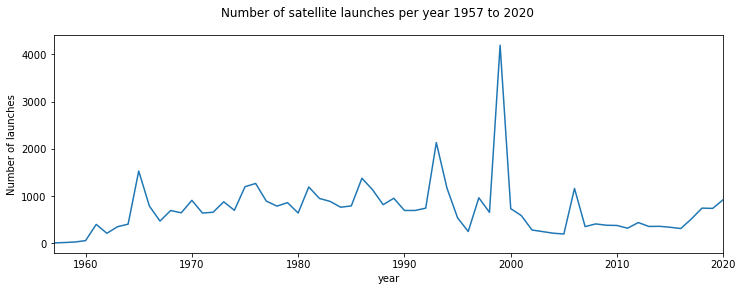

In [12]:
# ANSWER

import numpy as np
import matplotlib.pyplot as plt

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# total for all years, so sum over all months (axis 0)
n = data.sum(axis=0)
# clean way to do years
years = np.arange(1957,1957+data.shape[1])

name = f'Number of satellite launches per year {years[0]} to {years[-1]}'

# plot size 
x_size,y_size = 12,4
fig, axs = plt.subplots(1,1,figsize=(x_size,y_size))
fig.suptitle(name)
# plot y-data and set the label
axs.plot(years,n)
# set x-limits to get a neat graph
axs.set_xlim(years[0],years[-1])

axs.set_ylabel(f'Number of launches')
# x-label
axs.set_xlabel(f'year')

In [13]:
# ANSWER
# Print out the total number of 
# launches per month, for each month.

# use sum for total
# we can use data.shape[0] for the size of the 1st dimension
for m in range(data.shape[0]):
    print(f'{data[m].sum()} launches in month index {m}')
    

2173 launches in month index 0
3745 launches in month index 1
2895 launches in month index 2
3183 launches in month index 3
6606 launches in month index 4
5772 launches in month index 5
3279 launches in month index 6
2481 launches in month index 7
4402 launches in month index 8
4035 launches in month index 9
3273 launches in month index 10
3845 launches in month index 11


In [14]:
# ANSWER
# Print out the total number of 
# launches per year, for the years 2010 to 2020 inclusive

# use sum for total
for y in range(2010,2020+1):
    # y is a year, but we need index
    j = y - 1957
    print(f'{data[:,j].sum()} launches in year {y}')

373 launches in year 2010
315 launches in year 2011
435 launches in year 2012
352 launches in year 2013
355 launches in year 2014
335 launches in year 2015
308 launches in year 2016
512 launches in year 2017
741 launches in year 2018
735 launches in year 2019
922 launches in year 2020


#### Exercise 4

* Write code to print the months with highest and lowest number of launches

In [16]:
import numpy as np
# ANSWER
# Write code to print the months with 
# highest and lowest number of launches

# read data as before
filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# sum the data over all years (axis 1)
sum_per_month = data.sum(axis=1)
# Construct an array of months
month_array = 1 + np.arange(data.shape[0])

# Find the location (month) with **most** launches
# Find the index of sum_per_month with highest number (argmmax)
imax = np.argmax(sum_per_month)

# Find the location (month) with **least** launches
# Find the index of sum_per_month with lowest number (argmmax)
imin = np.argmin(sum_per_month)

print(f'the month with most   launches was',\
      f'{month_array[imax]} with {sum_per_month[imax]}')
print(f'the month with fewest launches was',\
      f'{month_array[imin]} with {sum_per_month[imin]}')

the month with most   launches was 5 with 6606
the month with fewest launches was 1 with 2173


#### Exercise 5

    def linear_func(c,m,x):
        return m * x + c
        
    x = np.arange(0,10.5,0.5)

    c_min,c_max,c_step = 0.0,1.,0.5
    m_min,m_max,m_step = 0.0,0.05,0.01

    grid_c,grid_m = np.mgrid[c_min:c_max+c_step:c_step,\
                             m_min:m_max+m_step:m_step]


* Use `np.newaxis` to reconcile the shapes of `grid_c`,`grid_m` and `x` 
* Make a single call to the function `linear_func`  using these reconciled variables
* Show how the shape of the output relates to the shape of the inputs 
* Confirm your result by plotting the results for each (c,m) value pair

In [41]:
# ANSWER
import numpy as np

def linear_func(c,m,x):
    return m * x + c

x = np.arange(0,10.5,0.5)

c_min,c_max,c_step = 0.0,1.,0.5
m_min,m_max,m_step = 0.0,0.05,0.01

grid_c,grid_m = np.mgrid[c_min:c_max+c_step:c_step,\
                         m_min:m_max+m_step:m_step]

# Use np.newaxis to reconcile the shapes of grid_c,grid_m and x
msg = '''
we are looking for output of shape 

    grid_c.shape + x.shape
    
so we add new axes to the final axis of grid_c,grid_m
and 2 new axes to the front of x
'''
print(msg)

grid_c1 = grid_c[:,:,np.newaxis]
grid_m1 = grid_m[:,:,np.newaxis]
x1      = x[np.newaxis,np.newaxis,:]
print(f'grid_c1 shape: {grid_c1.shape}')
print(f'grid_m1 shape: {grid_m1.shape}')
print(f'x1 shape:      {x1.shape}')

# Make a single call to the function linear_func 
# using these reconciled variables
y = linear_func(grid_c1,grid_m1,x1)

print(f'y shape:       {y.shape}')
msg = '''
Show how the shape of the output relates to the shape of the inputs 

The array y is of diemnsion (7, 6, 21)
values of c,m are on a grid (7, 6)
and x is (21,) so the result here involves
efficient element-wise multiplication
and addition for each combination of (c,m)
and each value of x
'''
print(msg)


we are looking for output of shape 

    grid_c.shape + x.shape
    
so we add new axes to the final axis of grid_c,grid_m
and 2 new axes to the front of x

grid_c1 shape: (3, 6, 1)
grid_m1 shape: (3, 6, 1)
x1 shape:      (1, 1, 21)
y shape:       (3, 6, 21)

Show how the shape of the output relates to the shape of the inputs 

The array y is of diemnsion (7, 6, 21)
values of c,m are on a grid (7, 6)
and x is (21,) so the result here involves
efficient element-wise multiplication
and addition for each combination of (c,m)
and each value of x



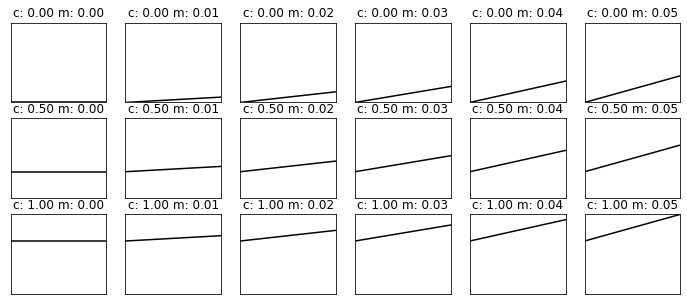

In [42]:
# Confirm your result by plotting the results for each (c,m) value pair
import matplotlib.pyplot as plt
ymin,ymax = y.min(),y.max()
xmin,xmax = x.min(),x.max()

# plots:     
fig, axs = plt.subplots(*(grid_c.shape),figsize=(12,5))
plt.setp(axs, xticks=[], yticks=[])

for i in range(y.shape[0]):
    for j in range(y.shape[1]):
        axs[i,j].plot(x,y[i,j],'k')
        axs[i,j].set_title(f'c: {grid_c[i,j]:.2f} m: {grid_m[i,j]:.2f}')
        axs[i,j].set_xlim(xmin,xmax)
        axs[i,j].set_ylim(ymin,ymax)